# 5502 Data Mining Final Project

Collaborators: John Palmer, Jamie Voros, Warren Fulton


### Midterm review
In this notebook, we pull data from our .csv files into the Jupyter Notebook environment.

We are using Kaggle's [Crude Oil](https://www.kaggle.com/awadhi123/crude-oil-stock-price) data to begin with and plan to pull in several more databases containing market data.

In [210]:
import pandas as pd

USOdf = pd.read_csv (r'crudeoil.csv')
USOdf['Price'] = USOdf['Close']
USOdf = USOdf.dropna()
USOdf.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Price
0,2000-03-22,27.65,28.250000,27.250000,27.459999,27.459999,92302.0,27.459999
1,2000-03-23,27.65,27.780001,27.160000,27.309999,27.309999,79373.0,27.309999
2,2000-03-24,27.85,28.150000,27.549999,27.980000,27.980000,55693.0,27.980000
4,2000-03-27,27.65,28.020000,27.410000,27.730000,27.730000,59199.0,27.730000
5,2000-03-28,27.60,27.870001,27.000000,27.080000,27.080000,39487.0,27.080000


In [216]:
SPYdf = pd.read_csv (r'SPY.csv')
SPYdf['Price'] = SPYdf['Close']
SPYdf = SPYdf.dropna()
SPYdf.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Price
0,1993-01-29,43.96875,43.96875,43.75000,43.93750,26.079659,1003200,43.93750
1,1993-02-01,43.96875,44.25000,43.96875,44.25000,26.265144,480500,44.25000
2,1993-02-02,44.21875,44.37500,44.12500,44.34375,26.320782,201300,44.34375
3,1993-02-03,44.40625,44.84375,44.37500,44.81250,26.599014,529400,44.81250
4,1993-02-04,44.96875,45.09375,44.46875,45.00000,26.710312,531500,45.00000


In [ ]:
BTCdf = pd.read_csv (r'CRYUSD/BTCUSD.csv')
BTCdf.head()

In [218]:
LTCdf = pd.read_csv (r'CRYUSD/LTCUSD.csv')
LTCdf.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Nov 11, 2020",59.339,57.950,59.725,57.950,397.23K,2.42%
1,"Nov 10, 2020",57.939,59.238,59.238,57.939,335.47K,-2.19%
2,"Nov 09, 2020",59.238,61.014,61.104,58.988,473.85K,-2.86%
3,"Nov 08, 2020",60.983,58.881,60.983,58.881,401.22K,3.57%
4,"Nov 07, 2020",58.881,63.179,63.179,58.881,941.52K,-6.80%


In [15]:
ETHdf = pd.read_csv (r'CRYUSD/ETHUSD.csv')
ETHdf.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Nov 11, 2020",466.60,450.65,474.15,450.65,97.93K,3.54%
1,"Nov 10, 2020",450.65,444.53,452.89,443.06,45.81K,1.38%
2,"Nov 09, 2020",444.53,455.17,456.67,441.48,70.69K,-2.34%
3,"Nov 08, 2020",455.17,435.96,456.74,435.96,67.84K,4.41%
4,"Nov 07, 2020",435.96,455.59,463.66,432.17,234.67K,-4.31%


In [212]:
def pairsAnalysis(df1, df2, purchase = 100, window=10, daysBetweenFlatten = 5):
    
    """
    df1: data frame, containing trades data of product 1
    df2: data frame, containing trades data of product 2
         Product 1 and 2 must be in the same currency
    purchase: float, the amount (in currency) we buy and sell each day
    window: int, number of days in window
    daysBewteenFlatten: int, number of days we go between position flattening.
    """
    
    from datetime import datetime, timedelta
    import pandas as pd
    
    try:
        dates1 = pd.to_datetime(df1['Date'])
        dates2 = pd.to_datetime(df2['Date'])
        startDate = max(min(dates1), min(dates2))
        endDate = min(max(dates1),max(dates2))
    except:
        print('Formatting error')
        return
    
    assert startDate < endDate, 'No date overlap'
    
    df1['DateNumeric'] = dates1
    df2['DateNumeric'] = dates2
    
    position1 = 0
    position2 = 0
    PnL = 0
    
    PnLvec = []
    position1vec = []
    position2vec = []
    price1vec = []
    price2vec = []
    
    i=0
    
    for Date in daterange(startDate, endDate - timedelta(days = window)):
        windowStart = Date
        windowEnd = Date + timedelta(days = window)
        
        if list(df1[(df1['DateNumeric'] == windowEnd)]['Price']) == [] or list(df2[(df2['DateNumeric'] == windowEnd)]['Price']) == []:
            continue
    
        df1Trim = df1[(df1['DateNumeric'] >= windowStart) & (df1['DateNumeric'] < windowEnd)]
        df2Trim = df2[(df2['DateNumeric'] >= windowStart) & (df2['DateNumeric'] < windowEnd)]
        
        try:
            prices1 = [float(x.replace(',','')) for x in list(df1Trim['Price'])]
        except:
            prices1 = [float(x) for x in list(df1Trim['Price'])]
        try:
            prices2 = [float(x.replace(',','')) for x in list(df2Trim['Price'])]
        except:
            prices2 = [float(x) for x in list(df2Trim['Price'])]
        
        totalDiff = sum(prices1) - sum(prices2)
        avgDiff = totalDiff/window
        
        try:
            price1 = float(list(df1[(df1['DateNumeric'] == windowEnd)]['Price'])[0].replace(',',''))
        except:
            try:
                price1 = list(df1[(df1['DateNumeric'] == windowEnd)]['Price'])[0]
            except:
                pass
        try:
            price2 = float(list(df2[(df2['DateNumeric'] == windowEnd)]['Price'])[0].replace(',',''))
        except:
            try:
                price2 = list(df2[(df2['DateNumeric'] == windowEnd)]['Price'])[0]
            except:
                pass
            
        diff = price1 - price2
        
        if diff > avgDiff:
            position2 += 100/price2
            position1 -= 100/price1

        elif diff < avgDiff:
            position1 += 100/price1
            position2 -= 100/price2
        else:
            pass
        
        if i %daysBetweenFlatten == 0:
            PnL += price1*position1*-1 + price2*position2*-1  
            position1 = 0
            position2 = 0
            
        PnLvec.append(PnL)
        position1vec.append(position1)
        position2vec.append(position2)
        price1vec.append(price1)
        price2vec.append(price2)
        i += 1
    
    if position1 != 0 or position2 != 0:
        PnL += price1vec[-1]*position1*-1 + price2vec[-1]*position2*-1  
        position1 = 0
        position2 = 0
        
        PnLvec.append(PnL)
        position1vec.append(position1)
        position2vec.append(position2)
        
    return PnLvec, position1vec, position2vec, price1vec, price2vec


def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)     

Text(0, 0.5, 'PnL (USD)')

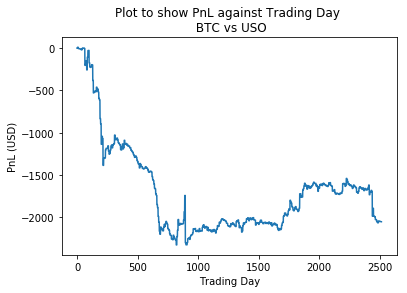

In [213]:
PnLvec, position1vec, position2vec, price1vec, price2vec = pairsAnalysis(BTCdf, USOdf, purchase = 1000, window=10, daysBetweenFlatten = 5)

plt.plot(PnLvec)
plt.title("Plot to show PnL against Trading Day \n BTC vs USO")
plt.xlabel("Trading Day")
plt.ylabel("PnL (USD)")


Text(0, 0.5, 'PnL (USD)')

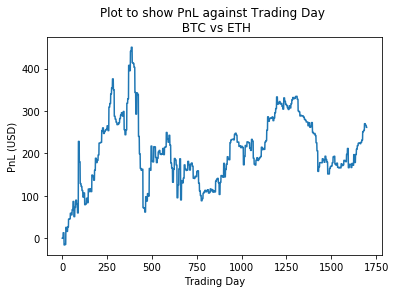

In [164]:
PnLvec, position1vec, position2vec, price1vec, price2vec = pairsAnalysis(BTCdf, ETHdf, purchase = 1000, window=10, daysBetweenFlatten = 5)

plt.plot(PnLvec)
plt.title("Plot to show PnL against Trading Day \n BTC vs ETH")
plt.xlabel("Trading Day")
plt.ylabel("PnL (USD)")


Text(0, 0.5, 'PnL (USD)')

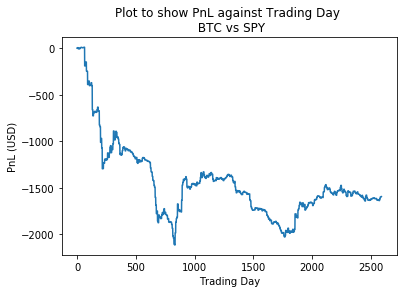

In [217]:
PnLvec, position1vec, position2vec, price1vec, price2vec = pairsAnalysis(BTCdf, SPYdf, purchase = 1000, window=10, daysBetweenFlatten = 5)

plt.plot(PnLvec)
plt.title("Plot to show PnL against Trading Day \n BTC vs SPY")
plt.xlabel("Trading Day")
plt.ylabel("PnL (USD)")


Text(0, 0.5, 'PnL (USD)')

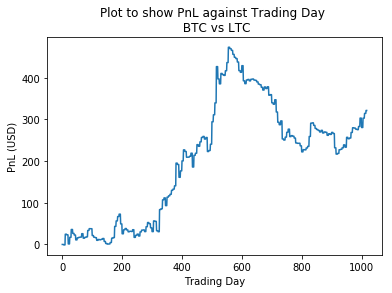

In [219]:
PnLvec, position1vec, position2vec, price1vec, price2vec = pairsAnalysis(BTCdf, LTCdf, purchase = 1000, window=10, daysBetweenFlatten = 5)

plt.plot(PnLvec)
plt.title("Plot to show PnL against Trading Day \n BTC vs LTC")
plt.xlabel("Trading Day")
plt.ylabel("PnL (USD)")


Text(0, 0.5, 'PnL (USD)')

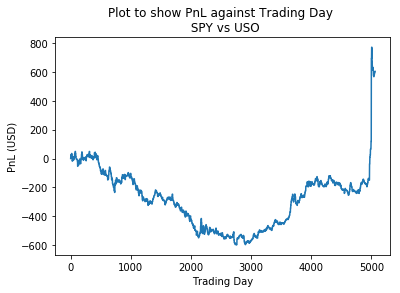

In [220]:
PnLvec, position1vec, position2vec, price1vec, price2vec = pairsAnalysis(SPYdf, USOdf, purchase = 1000, window=10, daysBetweenFlatten = 5)

plt.plot(PnLvec)
plt.title("Plot to show PnL against Trading Day \n SPY vs USO")
plt.xlabel("Trading Day")
plt.ylabel("PnL (USD)")
